In [4]:
import os
import numpy as np
import nibabel as nib

from tqdm import tqdm 

import matplotlib.pyplot as plt
from typing import Tuple, List


In [5]:
# Train Data
def get_path(data_path='train'):
    
    root = '/home/neamul/thesis_git/unet/data'
    
    data_path_x= os.path.join(root, data_path, 'x/')
    data_ids_x= next (os.walk(data_path_x)) [2]
    X_data=np.zeros((len(data_ids_x),192,192,192))

    data_path_y= os.path.join(root, data_path, 'y/')
    data_ids_y= next (os.walk(data_path_y)) [2]
    Y_data=np.zeros((len(data_ids_y),192,192,192))
    
    return X_data, Y_data, data_path_x, data_path_y,  data_ids_x, data_ids_y


def load_data(data_path='train'):
    
    X_data, Y_data, data_path_x, data_path_y,  data_ids_x, data_ids_y = get_path(data_path)
    
    for n, id_ in tqdm(enumerate(data_ids_x), total=len(data_ids_x)):
        path=data_path_x+id_
        img = nib.load(path) 
        data=img.get_fdata(dtype='float32').squeeze()
        X_data[n]=data
    for n, id_ in tqdm(enumerate(data_ids_y), total=len(data_ids_y)): 
        path=data_path_y+id_
        img = nib.load(path) 
        data=img.get_fdata(dtype='float32').squeeze()
        Y_data[n]=data
    
    return X_data, Y_data
    
def get_non_zero_images(x_data:np.ndarray, y_data:np.ndarray)->Tuple:
    '''
    x_data: [n, 192, 192, 192]
    y_data: [n, 192, 192, 192]
    '''
    indices = get_non_zero_indices(y_data)
    
    x_data = [x_data[i, indices[i]] for i in range(len(y_data))]
    x_data = np.concatenate(x_data, axis=0)
    
    y_data = [y_data[i, indices[i]] for i in range(len(y_data))]
    y_data = np.concatenate(y_data, axis=0)
    
    return x_data, y_data

def get_non_zero_indices(y_data:np.ndarray)->List[List[int]]:
    """
    y_data: [n , 192, 192, 192]
    """
    indices_list = []
    for img in range(len(y_data)):
        indices = []
        for index in range(192):
            px_count = np.sum(y_data[img, index])
            if px_count > 0:
                indices.append(index)
        indices_list.append(indices)
    
    return indices_list


In [6]:
# Load Data
#X_train, Y_train = load_data(data_path='train')
X_test, Y_test = load_data(data_path='test')
#X_valid, Y_valid = load_data(data_path='valid')
#Ctmask, unetMask = load_data(data_path='zlst')


#print(f"X_train: {X_train.shape} Y_train: {Y_train.shape}")
print(f"X_test: {X_test.shape} Y_test: {Y_test.shape}")
#print(f"X_valid: {X_valid.shape} Y_Valid: {Y_valid.shape}")
#print(f"CTmask: {Ctmask.shape} unetMask: {unetMask.shape}")

# Get non zero Data
#x_train, y_train = get_non_zero_images(X_train, Y_train)
x_test, y_test = get_non_zero_images(X_test, Y_test)
#x_valid, y_valid = get_non_zero_images(X_valid, Y_valid)
#CTmask, UNETmask = get_non_zero_images(Ctmask, unetMask)

#print(f"x_train: {x_train.shape} y_train: {y_train.shape}")
print(f"x_test: {x_test.shape} y_test: {y_test.shape}")
#print(f"x_valid: {x_valid.shape} y_valid: {y_valid.shape}")
#print(f"CTmask: {CTmask.shape} UNETmask: {UNETmask.shape}")


100%|██████████| 1/1 [00:00<00:00,  7.73it/s]

X_test: (1, 192, 192, 192) Y_test: (1, 192, 192, 192)
x_test: (102, 192, 192) y_test: (102, 192, 192)


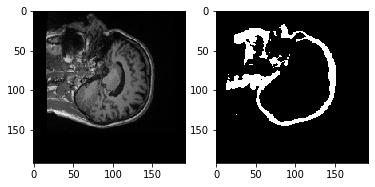

In [43]:
img = 39
plt.subplot(121)
plt.imshow(x_test[img], cmap='gray')
plt.subplot(122)
plt.imshow(y_test[img], cmap='gray')

plt.show()

In [35]:
data=['x_train','y_train','x_test','y_test','x_valid','y_valid']

In [36]:
#x_train=np.float32(x_train)
#y_train=np.float32(y_train)
x_test=np.float32(x_test)
y_test=np.float32(y_test)
#x_valid=np.float32(x_valid)
#y_valid=np.float32(y_valid)
#CTmask=np.float32(CTmask)
#UNETmask=np.float32(UNETmask)


In [16]:
#np.save('x_train4', x_train) # save
#np.save('y_train4', y_train) # save
np.save('x_test_ZLST15', x_test) # save
np.save('y_test_ZLST15', y_test) # save
#np.save('x_valid4', x_valid) # save
#np.save('y_valid4', y_valid) # save

In [ ]:
#np.save('y_train', y_train) # save

In [25]:
y_train.size

NameError: name 'y_train' is not defined

In [26]:
x_train.size

NameError: name 'x_train' is not defined

In [27]:
y2_train=np.load('y_train.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'y_train.npy'

In [28]:
y2_train.size

NameError: name 'y2_train' is not defined

In [37]:
# save as nifty image

filename=os.path.join("/home/neamul/thesis_git/unet/data/test/y/15.nii")

#data=img.get_fdata(dtype='float32').squeeze()
imgaff=nib.load(filename)
aff=imgaff.affine

In [38]:
imgNew=nib.Nifti1Image(y_test,aff)
imgNew.to_filename(os.path.join('CTmask_Zstl_Nonzero.nii'))

In [ ]:
aff

In [41]:
#TO check

filename=os.path.join("/home/neamul/thesis_git/CTmask_Wast_Nonzero.nii")

imgaff=nib.load(filename)
data=img.get_fdata().squeeze()
plt.imshow (data[90])

AttributeError: 'int' object has no attribute 'get_fdata'